In [4]:
# Step 1: Google Drive mount panni dataset load panniduvom
from google.colab import drive
import pandas as pd

# Google Drive mount panni, file access pannanum
drive.mount('/content/drive')

# CSV file load panniduvom (path correct-a irukka nu check pannu)
file_path = '/content/drive/My Drive/Dataset/airplaneCustomer.csv'  # Path update pannu
df = pd.read_csv(file_path)

# Dataset check panni, first few rows kaamikku
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [5]:
# Step 2: Data preprocessing panni kaam pannuvom

# Missing values irundhaa check pannu
print(df.isnull().sum())

# Missing values irundha rows drop pannu (imputation use pannalam venna)
df = df.dropna()

# Categorical variables encode pannu (Label Encoding use pannalam simple-a)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Categorical columns list pannirukkom, ivangalai encode pannu
categorical_cols = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

# Label Encoding apply panni categorical columns-a change pannu
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Data types and quick summary check pannu
print(df.info())


num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int64  
 2   trip_type              50000 non-null  int64  
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  5000

In [6]:
# Step 3: Train-Test Split pannuvom

from sklearn.model_selection import train_test_split

# Features (X) and target variable (y) define panniduvom
X = df.drop('booking_complete', axis=1)  # Features (target column-a exclude panniduvom)
y = df['booking_complete']  # Target variable

# Data-a split pannu training and testing sets-a (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Datasets shape check pannu
print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')


Training data shape: (40000, 13)
Test data shape: (10000, 13)


In [7]:
# Step 4: Gradient Boosting (XGBoost) and Random Forest use panni model train pannuvom

# Required libraries import pannuvom
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Default parameters kooda models initialize pannuvom
rf_model = RandomForestClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')

# Step 4.1: Random Forest model train pannuvom
rf_model.fit(X_train, y_train)

# Step 4.2: XGBoost model train pannuvom
xgb_model.fit(X_train, y_train)

# Step 4.3: Rendu models-a evaluate pannuvom

# RandomForest model use panni predict pannuvom
rf_y_pred = rf_model.predict(X_test)

# XGBoost model use panni predict pannuvom
xgb_y_pred = xgb_model.predict(X_test)

# Random Forest accuracy score kaamikku
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# XGBoost accuracy score kaamikku
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")


Random Forest Accuracy: 0.8562
XGBoost Accuracy: 0.8532


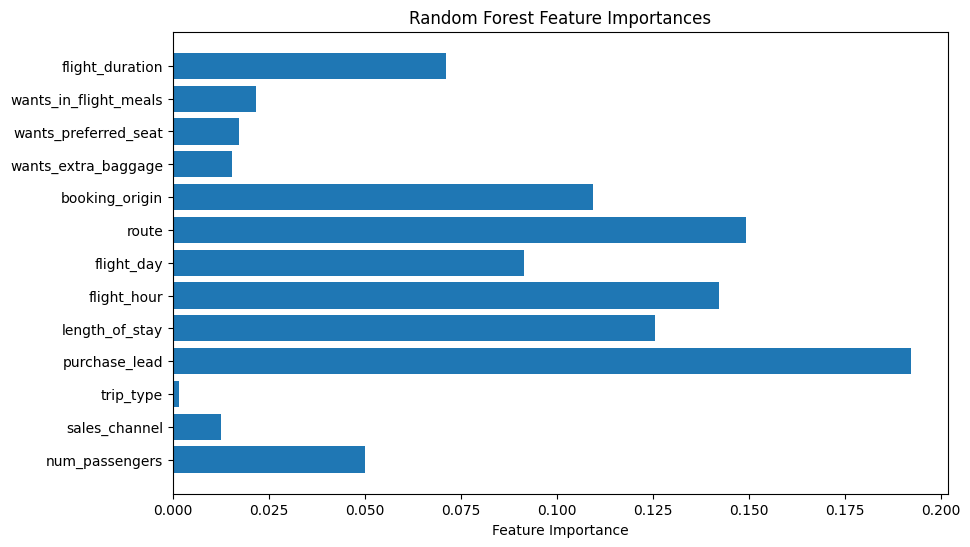

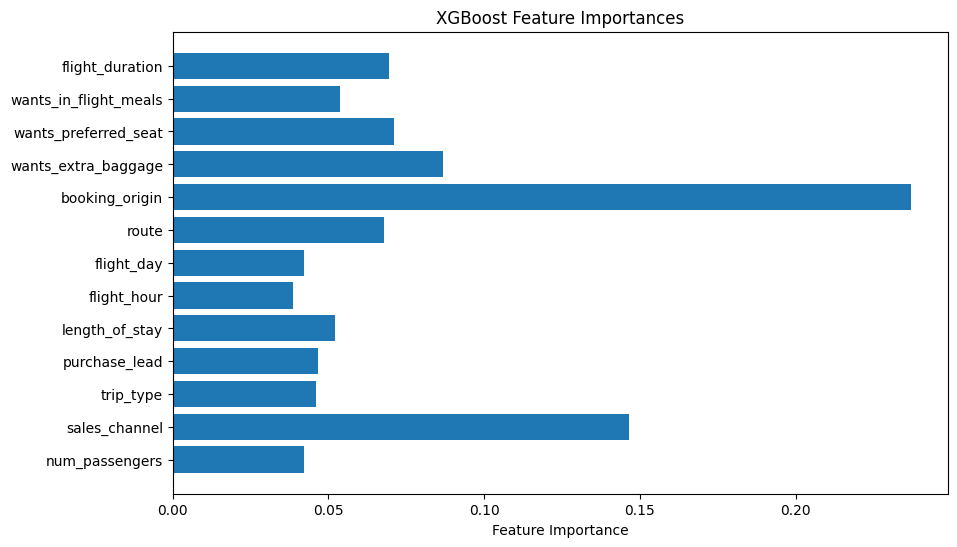

In [8]:
# Step 5: Feature importance-a visualize pannuvom

import matplotlib.pyplot as plt

# Random Forest-oda feature importance kaamikku
rf_feature_importance = rf_model.feature_importances_

# XGBoost-oda feature importance kaamikku
xgb_feature_importance = xgb_model.feature_importances_

# Random Forest feature importance-a plot pannuvom
plt.figure(figsize=(10, 6))
plt.title('Random Forest Feature Importances')
plt.barh(X.columns, rf_feature_importance)
plt.xlabel('Feature Importance')
plt.show()

# XGBoost feature importance-a plot pannuvom
plt.figure(figsize=(10, 6))
plt.title('XGBoost Feature Importances')
plt.barh(X.columns, xgb_feature_importance)
plt.xlabel('Feature Importance')
plt.show()


In [11]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Models initialize pannuvom
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')  # Random Forest-oda balanced class weight
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss', scale_pos_weight=1)  # XGBoost-oda class balancing

# Stratified K-Fold Cross-Validation set pannu (imbalanced classes handle panna)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Random Forest-oda cross-validation pannuvom
rf_cv_scores = cross_val_score(rf_model, X, y, cv=stratified_kfold, scoring='accuracy')
print(f"Random Forest Cross-Validation Accuracy: {rf_cv_scores.mean():.4f} ± {rf_cv_scores.std():.4f}")

# XGBoost-oda cross-validation pannuvom
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=stratified_kfold, scoring='accuracy')
print(f"XGBoost Cross-Validation Accuracy: {xgb_cv_scores.mean():.4f} ± {xgb_cv_scores.std():.4f}")


Random Forest Cross-Validation Accuracy: 0.8531 ± 0.0010
XGBoost Cross-Validation Accuracy: 0.8482 ± 0.0005
